# Introdução a análise de dados com Pandas
## Histograma e gráfico de frequência

Histogramas e gráficos de frequência são utilizados para analisar a distribuição de frequência de um determinado conjunto de dados. Na sua versão para dados contínuos, o histograma representa a frequência com a qual os valores presentes no conjunto estudado aparecem em intervalos de tamanho igual pré-calculados. Para entender o uso desse tipo de gráfico, trabalharemos com uma nova base denominada ```housing_ok.csv```, contendo dados imobiliários da cidade de Melbourne, Austrália.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

housing = pd.read_csv('dados/housing_ok.csv')

Iniciamos a análise execcutando o comando ```DataFrame.info()``` para investigar o conteúdo da tabela.

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
bairro                 3021 non-null object
endereco               3021 non-null object
quartos                3021 non-null float64
tipo                   3021 non-null object
preco                  3021 non-null float64
distancia_aeroporto    3021 non-null float64
cep                    3021 non-null float64
banheiros              3021 non-null float64
vagas                  3021 non-null float64
area_terreno           3021 non-null float64
area_construida        3021 non-null float64
ano_construcao         3021 non-null float64
latitude               3021 non-null float64
longitude              3021 non-null float64
dtypes: float64(11), object(3)
memory usage: 330.5+ KB


Temos um total de 14 colunas, sendo 11 do tipo numérico real (```float64```) e 3 do tipo texto (```object```). Investigaremos as colunas ```quartos```, ```banheiros``` e ```vagas``` para verificar se existe necessidade de manter o tipo ```float64```.

Obs: Esse passo é opcional. A transformação de tipos de dados melhora a eficiência do uso de memória por parte do ```DataFrame```. O tipo ```float64``` ocupa mais espaço do que o tipo ```int64```, por exemplo.

Utilizaremos o comando ```DataFrame.nome_da_coluna.unique()``` para verificar a diversidade de valores contidos nas três colunas.

In [3]:
print(housing.quartos.unique())
print(housing.banheiros.unique())
print(housing.vagas.unique())

[2. 3. 4. 5. 6. 1. 8. 7.]
[1. 2. 4. 3. 5. 6. 8. 7.]
[1. 2. 0. 3. 4. 6. 5. 7. 8.]


É possível perceber que não existe, de fato, a necessidade de manter o tipo das três colunas como ```float64```. O formato ```int8``` consegue guardar valores no intervalo de -128 até 127. Sabemos que seria pouco provável a existência de um imóvel com mais de 127 quartos, banheiros ou vagas. Sendo assim, faz sentido utilizarmos esse formato. Para modificar o tipo de uma coluna, utilizamos o comando ```DataFrame.nome_da_coluna.astype('int8')```, atribuindo o resultado à própria coluna.

In [4]:
housing.quartos = housing.quartos.astype('int8')
housing.banheiros = housing.banheiros.astype('int8')
housing.vagas = housing.vagas.astype('int8')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 14 columns):
bairro                 3021 non-null object
endereco               3021 non-null object
quartos                3021 non-null int8
tipo                   3021 non-null object
preco                  3021 non-null float64
distancia_aeroporto    3021 non-null float64
cep                    3021 non-null float64
banheiros              3021 non-null int8
vagas                  3021 non-null int8
area_terreno           3021 non-null float64
area_construida        3021 non-null float64
ano_construcao         3021 non-null float64
latitude               3021 non-null float64
longitude              3021 non-null float64
dtypes: float64(8), int8(3), object(3)
memory usage: 268.5+ KB


Observe que o uso de memória do ```DataFrame``` caiu de 330.5+ KB para 268.5+ KB.

Para nosso primeiro gráfico de frequência, plotaremos o resultado associado ao número de quartos. Como visto anteriormente, o número de quartos representa um conjunto limitado de opções. Para contar a frequência de ocorrência dos valores de uma coluna, utilizamos o comando ```DataFrame.nome_da_coluna.value_counts()```.

In [5]:
housing.quartos.value_counts()

3    1390
4     711
2     688
5     159
1      54
6      14
7       3
8       2
Name: quartos, dtype: int64

O resultado obtido é representado na forma de um ```DataFrame``` de coluna única (denominado ```Series```), com o número de quartos como indice e as frequências correspondentes como os valores. Criaremos a variável ```quartos_freq``` para guardar a série. Para acessar a lista de indices e valores, utilizamos os comandos ```Series.index``` e ```Series.values```, respectivamente. 

Utilizaremos o gráfico de barras para plotar o resultado, passando os índices e valores como parâmetros.

<BarContainer object of 8 artists>

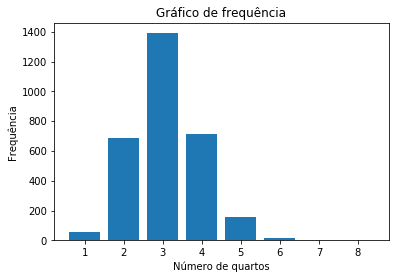

In [6]:
quartos_freq = housing.quartos.value_counts()
plt.title('Gráfico de frequência')
plt.xlabel('Número de quartos')
plt.ylabel('Frequência')
plt.bar(quartos_freq.index, quartos_freq.values)

Através do gráfico de frequência gerado é possível concluir que a maioria dos imóveis da tabela possui entre 2 e 4 quartos, sem 3 o valor com maior frequência.

Para criar histogramas (gráfico de frequência para dados contínuos), utilizaremos o comando ```plt.hist()```. Para o exemplo, faremos o histograma dos preços dos imóveis.

Text(0, 0.5, 'Frequência')

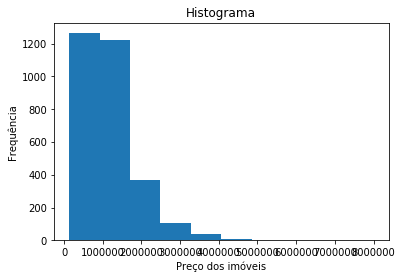

In [7]:
plt.hist(housing.preco)
plt.title('Histograma')
plt.xlabel('Preço dos imóveis')
plt.ylabel('Frequência')

Observe que os valores dos preços mostrados no eixo $x$ são de difícil visualização. Para resolver o problema, dividiremos todos os preços por 1000.

Text(0, 0.5, 'Frequência')

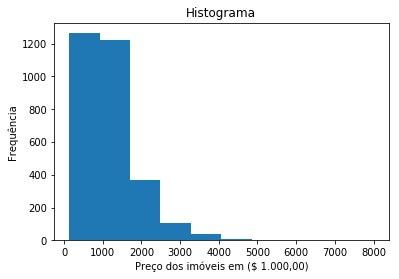

In [8]:
plt.hist(housing.preco / 1000)
plt.title('Histograma')
plt.xlabel('Preço dos imóveis em ($ 1.000,00)')
plt.ylabel('Frequência')

Analisando o histograma acima, observamos que a maioria dos preços é inferior a 2 milhões. Para melhorar a visualização, podemos eliminar os preços que aparecem com menor frequência. Analisando o histograma, parece sensato eliminarmos valores superiores a 5 milhões.

Text(0, 0.5, 'Frequência')

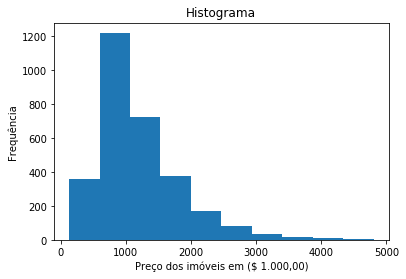

In [9]:
filtro = (housing.preco <= 5000000)
plt.hist(housing[filtro].preco / 1000)
plt.title('Histograma')
plt.xlabel('Preço dos imóveis em ($ 1.000,00)')
plt.ylabel('Frequência')

Com o novo histograma é possível identificar que boa parte dos imóveis possuem valores de quinhentos mil a um milhão de dólares.

Para melhor analisar a distribuição de preços dos imóveis, precisamos considerar os tipos. Utilizando o comando ```unique()```, verificaremos os tipos de imóveis.

In [10]:
housing.tipo.unique()

array(['kitnet', 'casa', 'apartamento'], dtype=object)

Temos três tipos de imóveis (kitnet, casa e apartamento). Para cada tipo, criaremos o histograma de preços para comparar as distribuições de frequência.

Text(0, 0.5, 'Frequência')

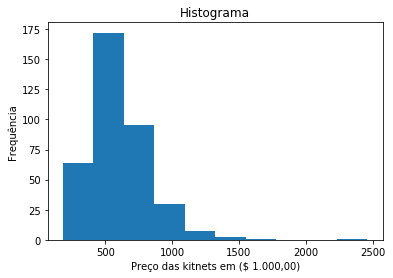

In [11]:
filtro = (housing.tipo == 'kitnet')
plt.hist(housing[filtro].preco / 1000)
plt.title('Histograma')
plt.xlabel('Preço das kitnets em ($ 1.000,00)')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

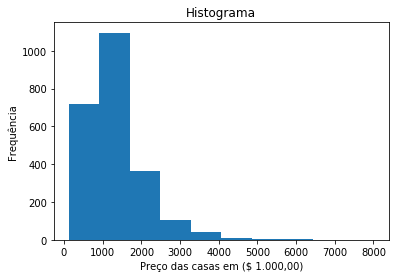

In [12]:
filtro = (housing.tipo == 'casa')
plt.hist(housing[filtro].preco / 1000)
plt.title('Histograma')
plt.xlabel('Preço das casas em ($ 1.000,00)')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

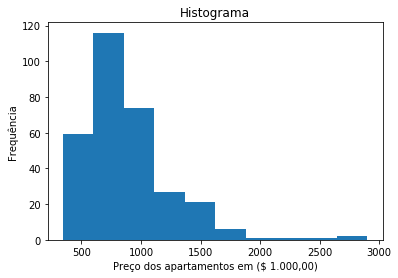

In [13]:
filtro = (housing.tipo == 'apartamento')
plt.hist(housing[filtro].preco / 1000)
plt.title('Histograma')
plt.xlabel('Preço dos apartamentos em ($ 1.000,00)')
plt.ylabel('Frequência')